In [1]:
import pandas as pd
import sys 
sys.path.insert(0, '/10 A KAI 2/week 1/Stock_Price_Analysis/')

In [2]:
from src.text_analysis import TextAnalyzer
from src.Descrip_anal import Descriptives

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [4]:
result = TextAnalyzer(df)

In [5]:
df = result.remove_unname()

##### do sentiment analysis on the headline col after removing stopwords 

In [6]:
result.sentiment_analysis()

,headline,url,publisher,date,stock,cleaned_headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,stocks hit 52 week highs friday,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,stocks hit 52 week highs wednesday,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,71 biggest movers friday,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,46 stocks moving friday mid day session,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,b securities maintains neutral agilent technol...,Neutral
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,top narrow based indexes august 29,Positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,recap wednesday top percentage gainers losers,Positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,update oppenheimer color china zenix auto init...,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,oppenheimer initiates china zenix outperform 8 pt,Neutral


##### extract top 10 keywords from the headline in word lavel using TFIDF and bigram lavel 

In [52]:
wor, big = result.keyword_extraction()

In [45]:
wor

,Keyword,TF-IDF Score
0,earnings,78328.184675
1,eps,62401.313224
2,est,53859.726234
3,market,94797.566144
4,reports,64795.431428
5,sales,47344.869661
6,shares,93176.130946
7,stocks,149539.632769
8,update,75366.829457
9,vs,65826.306491


In [53]:
big

,Bigram,Count
0,"(eps, 0)",83791
1,"(52, week)",51006
2,"(vs, 0)",47735
3,"(price, target)",47274
4,"(benzinga, top)",44259
5,"(stocks, moving)",40032
6,"(mid, day)",37324
7,"(market, update)",33101
8,"(earnings, scheduled)",32054
9,"(initiates, coverage)",28993


In [54]:
big['Bigram']=big['Bigram'].apply(lambda x: ' '.join(x))


In [55]:
big

,Bigram,Count
0,eps 0,83791
1,52 week,51006
2,vs 0,47735
3,price target,47274
4,benzinga top,44259
5,stocks moving,40032
6,mid day,37324
7,market update,33101
8,earnings scheduled,32054
9,initiates coverage,28993


##### plot extracted top word and bigram word using bar graph

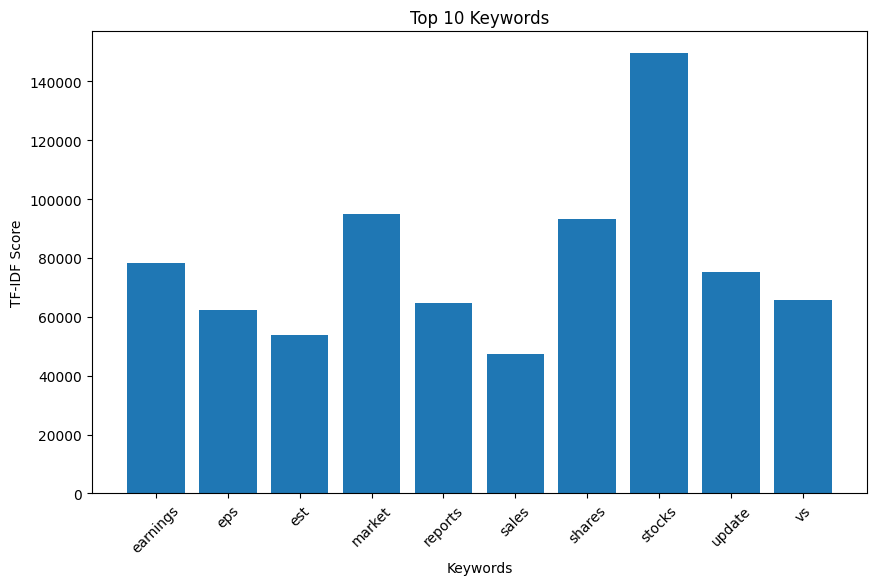

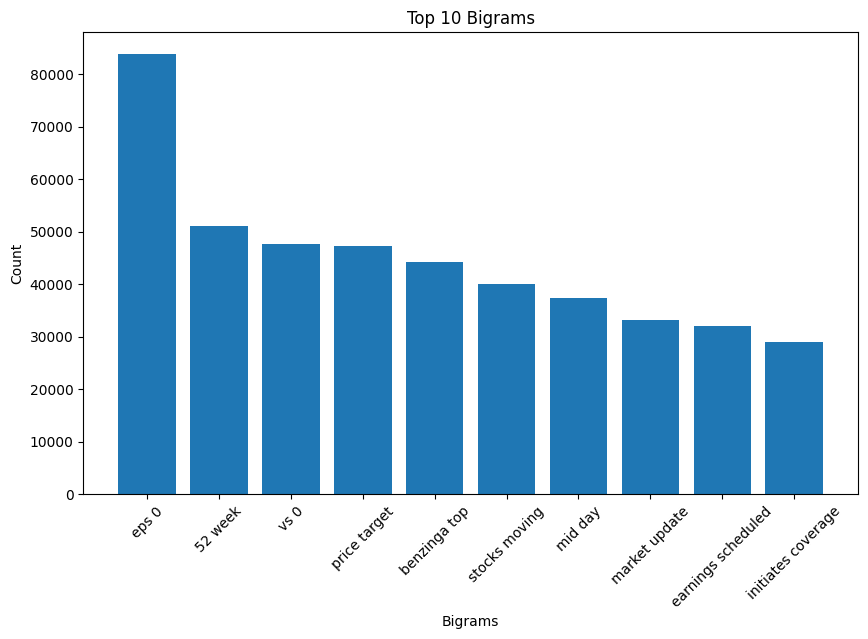

In [56]:
result.plot_keyword_extraction(wor,big)